## **Import Library**

In [ ]:
#Install Library
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install PySastrawi
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 3.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.0 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=8c4ff72e553598f87d2f46f446c705a85e27171ce5a1b6842ccadbca98c4ef93
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://

In [ ]:
#Import library
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
from datetime import timedelta
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Pengumpulan Data**

### **Crawling Data**

In [ ]:
#Install Library
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import library
import snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
import re

In [ ]:
#Creating list to append tweet data to
tweets_list = []

In [ ]:
#Using TwitterSearchScrapper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('polisi since:2022-06-01 until:2022-011-01').get_items()):
  if i>1000:
    break
  tweets_list.append([tweet.date, tweet.username, tweet.content])

<ipython-input-435-61aff9faeae8>:5: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.username, tweet.content])


In [ ]:
#Creating a dataframe from the tweets list above
tweet = pd.DataFrame(tweets_list, columns=['Datatime', 'Username', 'Text'])

In [ ]:
#Tampilkan hasil crawling data
tweet

,Datatime,Username,Text
0,2022-10-31 23:59:50+00:00,Polsek_Pdr442,Sambang obyek vital Bhabinkamtibmas AIPTU Sisw...
1,2022-10-31 23:59:04+00:00,joekampret1,Ini arah kudeta boss \nKnp Polri dan TNI diem ...
2,2022-10-31 23:58:45+00:00,el_f4hm1,@GrangerKeren @GratisTerbaik @CCICPolri @DivHu...
3,2022-10-31 23:58:44+00:00,Ky46W1,@tvOneNews Bisa kasih contoh dong dri bapak² k...
4,2022-10-31 23:58:12+00:00,NunoenkZidan,@olvaholvah @DivHumas_Polri @ListyoSigitP @Kom...
...,...,...,...
996,2022-10-31 14:38:10+00:00,NTMC_Info,Pantauan Langsung Arus Lalu Lintas Hari Ini Be...
997,2022-10-31 14:38:03+00:00,inilahdotcom,"Brigjen Hendra Kurniawan Dipecat Polri, Diangg..."
998,2022-10-31 14:37:47+00:00,Adh1stya,@UtangJpu @DivHumas_Polri
999,2022-10-31 14:37:39+00:00,jiggle2222,@kylantower @sayainiultramen @mazzini_gsp Seme...


In [ ]:
#Simpan data dalam bentuk csv
tweet.to_csv(r'DataPolri.csv', index=False)

### **Data Hasil Crawling**

In [ ]:
#Read Data
def load_data():
  data = pd.read_csv('DataPolri.csv')
  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df = pd.DataFrame(tweet_df[['Text']])
tweet_df

,Text
0,Sambang obyek vital Bhabinkamtibmas AIPTU Sisw...
1,Ini arah kudeta boss \nKnp Polri dan TNI diem ...
2,@GrangerKeren @GratisTerbaik @CCICPolri @DivHu...
3,@tvOneNews Bisa kasih contoh dong dri bapak² k...
4,@olvaholvah @DivHumas_Polri @ListyoSigitP @Kom...
...,...
996,Pantauan Langsung Arus Lalu Lintas Hari Ini Be...
997,"Brigjen Hendra Kurniawan Dipecat Polri, Diangg..."
998,@UtangJpu @DivHumas_Polri
999,@kylantower @sayainiultramen @mazzini_gsp Seme...


## **Pre Processing**

### **Pre Processing**

In [ ]:
# Pre processing
from nltk import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from string import punctuation
import re

def text_cleaning(data):
    # case folding
    data = data.lower()
    # remove punctuation
    data = re.sub('[^\w\s]', ' ', data)
    # remove numbers
    data = re.sub('\d+', '', data)
    # remove extra whitespace
    data = ' '.join(data.split())
    # remove emoji
    data = re.sub(r'[^\x00-\x7F]+', ' ', data)
    # remove new line
    data = re.sub('\n', ' ', data)
    return data

# Stemming
def stemmer_sastrawi(data):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    return data


# Stopword Removal
def stopword_removal(data):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    return data

# Bahasa alay removal
# Kamus alay
kamus_alay_1 = pd.read_csv(
    "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt",
    delimiter="\t",
    header=None,
    names=['slang', 'formal'])
kamus_alay_2 = pd.read_csv(
    "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv",
    usecols=["slang", "formal"])

kamus_alay = pd.concat([kamus_alay_1, kamus_alay_2])

# Dictionary bahasa alay
dict_alay = dict()
for index, row in kamus_alay.iterrows():
    dict_alay[row['slang']] = row['formal']


def normalize_text(data):
    word_tokens = word_tokenize(data)
    result = [dict_alay.get(w, w) for w in word_tokens]
    return ' '.join(result)


# Pre processing
from nltk import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from string import punctuation
import re

def preprocessing(data):
    data = text_cleaning(data)
    data = normalize_text(data)
    data = stemmer_sastrawi(data)
    data = stopword_removal(data)
    return data

In [ ]:
from tqdm.auto import tqdm
import preprocessor as p
tqdm.pandas()
tes_filter = tweet_df["Text"].progress_apply(p.clean)
tes_filter

  0%|          | 0/1001 [00:00<?, ?it/s]

0       Sambang obyek vital Bhabinkamtibmas AIPTU Sisw...
1       Ini arah kudeta boss Knp Polri dan TNI diem sj...
2       Brapa % yg meninggal atau KIPI berat dibanding...
3         Bisa kasih contoh dong dri bapak kepolisian ...
4       Pantesan gk ngelawan ternyata d pukulin kakany...
                              ...                        
996     Pantauan Langsung Arus Lalu Lintas Hari Ini Be...
997     Brigjen Hendra Kurniawan Dipecat Polri, Diangg...
998                                                      
999     Sementara brigjen hendra seorang pati polri me...
1000    Untuk menjaga kepercayaan masyarakat, Polri pe...
Name: Text, Length: 1001, dtype: object

In [ ]:
tes_filter = tes_filter.progress_apply(preprocessing)
tes_filter

  0%|          | 0/1001 [00:00<?, ?it/s]

0       sambang obyek vital bhabinkamtibmas aiptu sisw...
1       arah kudeta bos polri tni diam gerak tangkap t...
2                  tinggal kipi berat banding hidup sehat
3                                     kasih contoh polisi
4                       pantesan lawan kakak tunggu sakit
                              ...                        
996     pantau arus lintas briptu anizha wib senin okt...
997     brigjen hendra kurniawan pecat polri anggap ce...
998                                                      
999     brigjen hendra pati polri skenario fs bilang s...
1000    jaga percaya masyarakat polri institusi puan m...
Name: Text, Length: 1001, dtype: object

In [ ]:
tes_filter.duplicated().sum(), len(tes_filter)

(0, 894)

In [ ]:
tes_filter = tes_filter.drop_duplicates()
tes_filter.duplicated().sum(), len(tes_filter)

(0, 894)

In [ ]:
tes_filter

0      sambang obyek vital bhabinkamtibmas aiptu sisw...
1      arah kudeta bos polri tni diam gerak tangkap t...
2                 tinggal kipi berat banding hidup sehat
3                                    kasih contoh polisi
4                      pantesan lawan kakak tunggu sakit
                             ...                        
994                                            deh duduk
995                                tolong fastrespond cc
996    pantau arus lintas briptu anizha wib senin okt...
997    brigjen hendra kurniawan pecat polri anggap ce...
999    brigjen hendra pati polri skenario fs bilang s...
Name: Text, Length: 894, dtype: object

In [ ]:
tes_filter.to_csv("DataPolriPreprocessing.csv", index=False)

## **Labelling**

In [ ]:
tweet_df = pd.read_csv("DataPolriPreprocessing.csv")
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    893 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [ ]:
tweet_df['Text'] = tweet_df['Text'].astype('str')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    894 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [ ]:
from textblob import TextBlob

#Sentiment analisis dengan polarity menggunakan textblob
def analize_sentiment(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0:
    return 1
  elif analysis.sentiment.polarity == 0:
    return 0
  else:
    return -1
  def analize_subjectorobject(tweet):
    #Polaritas
    analysis = TextBlob(tweet_df(tweet))
    if analysis.sentiment.polarity > 0:
      return 'Positif'
    elif analysis.sentiment.polarity == 0:
      return 'Neutral'
    else:
      return 'Negatif'

In [ ]:
Data_tweet = list(tweet_df['Text'])
polaritas = 0

StatuS = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(Data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    StatuS.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    StatuS.append('Netral')
  else:
    total_negatif += 1
    StatuS.append('Negatif')

  total += 1

In [ ]:
STATUS = pd.DataFrame({'Klasifikasi': StatuS})
STATUS

,Klasifikasi
0,Positif
1,Netral
2,Netral
3,Netral
4,Netral
...,...
889,Netral
890,Netral
891,Netral
892,Netral


In [ ]:
tweet_df['Klasifikasi'] = STATUS
tweet_df.head()

In [ ]:
tweet_df.head()

,Text,Label,Klasifikasi
0,sambang obyek vital bhabinkamtibmas aiptu sisw...,1,Positif
1,arah kudeta bos polri tni diam gerak tangkap t...,0,Netral
2,tinggal kipi berat banding hidup sehat,0,Netral
3,kasih contoh polisi,0,Netral
4,pantesan lawan kakak tunggu sakit,0,Netral


In [ ]:
tweet_df['Label'] = tweet_df['Text'].apply(lambda x: analize_sentiment(x))
tweet_df.head()

,Text,Label
0,sambang obyek vital bhabinkamtibmas aiptu sisw...,1
1,arah kudeta bos polri tni diam gerak tangkap t...,0
2,tinggal kipi berat banding hidup sehat,0
3,kasih contoh polisi,0
4,pantesan lawan kakak tunggu sakit,0


In [ ]:
tweet_df['Label'] = tweet_df['Text'].apply(lambda x: analize_sentiment(x))
tweet_df

In [ ]:
tweet_df.Klasifikasi.value_counts()

Netral     854
Negatif     24
Positif     16
Name: Klasifikasi, dtype: int64

In [ ]:
tweet_df.Label.value_counts()

 0    854
-1     24
 1     16
Name: Label, dtype: int64

In [ ]:
def show_pie(label, data, legend_title):
  fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(aspect='equal'))

  labels = [x.split()[-1] for x in label]

  def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

  ax.legend(wedges, labels,
            title = legend_title,
            loc = "center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=10, weight="bold")
  plt.show()

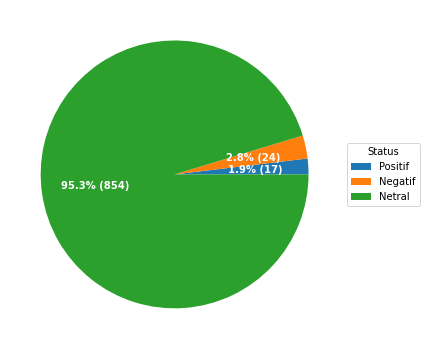

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [ ]:
Neg_Text = tweet_df[tweet_df.Label == -1]
Neg_Words = []
for t in Neg_Text.Text:
    Neg_Words.append(t)
Neg_Words[:5]

['hebat iya lelaki milenial ngondek brutal kayak hrhe',
 'layan call center polri lindung ayom layan masyarakat layan jamrespon cepat adu masyarakat',
 'mbak miring miring arah barat prinsip sebar gaduh protes victim cari usul menkominfo cocok karakter',
 'tampar umum anak saksi mental anak anak',
 'alas keras usut tegak hukum polri ayom masyarakat']

In [ ]:
Net_Text = tweet_df[tweet_df.Label == 0]
Net_Words = []
for t in Net_Text.Text:
    Net_Words.append(t)
Net_Words[:5]

['arah kudeta bos polri tni diam gerak tangkap tindak humanis cocok halal darah',
 'tinggal kipi berat banding hidup sehat',
 'kasih contoh polisi',
 'pantesan lawan kakak tunggu sakit',
 'payung hukum warga tetangga masyarakat hak dobrak rumah tetangga indikasi keras aneh rumah warga takut care']

In [ ]:
Pos_Text = tweet_df[tweet_df.Label == 1]
Pos_Words = []
for t in Pos_Text.Text:
    Pos_Words.append(t)
Pos_Words[:5]

['sambang obyek vital bhabinkamtibmas aiptu siswanto ikan himbauan aman tertib masyarakat terap protokol sehat',
 'saudara laki agama iya ruang ustadznya clear lompat pagar',
 'anggota polsek babelan laksana patroli strong poin rangka cegah aksi kriminalitas malam antisipasi tawur jalan raya kppulo timaha babelan kota camat babelan selasa poldametrojaya',
 'lintas polres teluk bintuni ikan layan strong points pagi selamat aktivitas taat atur selamat',
 'jabat memaang selelu kawal suka main']

Term Frequencies of each Sentiment class

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(tweet_df.Text)

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [ ]:
neg_matrix = cvector.transform(tweet_df[tweet_df.Label == -1].Text)
net_matrix = cvector.transform(tweet_df[tweet_df.Label == 0].Text)
pos_matrix = cvector.transform(tweet_df[tweet_df.Label == 1].Text)

In [ ]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Kata','Negative'])
neg_tf_df = neg_tf.set_index('Kata')
neg_tf_df.head()

,Negative
Kata,
anak,8
manusia,8
polri,7
alas,6
tni,4


In [ ]:
neg_tf.head()

,Kata,Negative
0,anak,8
1,manusia,8
2,polri,7
3,alas,6
4,tni,4


In [ ]:
net_words = net_matrix.sum(axis=0)
net_words_freq = [(word, net_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
net_words_tf = pd.DataFrame(list(sorted(net_words_freq, key = lambda x: x[1], reverse=True)),columns=['Kata','Netral'])
net_words_tf_df = net_words_tf.set_index('Kata')
net_words_tf_df.head()

,Netral
Kata,
polri,315
masyarakat,103
polisi,76
anak,59
iya,54


In [ ]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Kata','Positive'])
pos_words_tf_df = pos_words_tf.set_index('Kata')
pos_words_tf_df.head()

,Positive
Kata,
polri,5
laki,4
main,4
babelan,3
ikan,2


In [ ]:
term_freq_df = pd.concat([neg_tf_df,net_words_tf_df,pos_words_tf_df],axis=1)

In [ ]:
term_freq_df['Total'] = term_freq_df['Positive'] \
                                 + term_freq_df['Netral'] \
                                 +  term_freq_df['Negative']
term_freq_df.sort_values(by='Total', ascending=False).head(20)

,Negative,Netral,Positive,Total
Kata,,,,
polri,7,315,5,327
masyarakat,3,103,1,107
polisi,1,76,1,78
anak,8,59,0,67
iya,3,54,2,59
sih,3,37,1,41
indonesia,0,40,0,40
tangkap,0,40,0,40
kapolri,0,38,0,38


Text(0.5, 1.0, 'Top 20 Text')

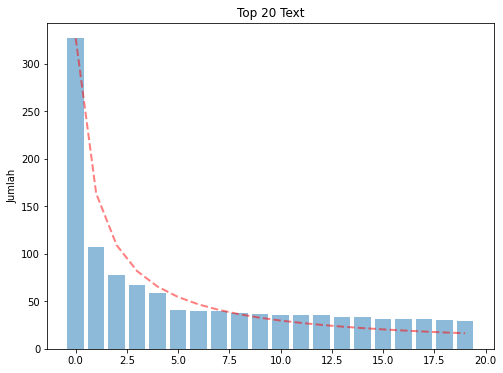

In [ ]:
y_pos = np.arange(20)
plt.figure(figsize=(8,6))
s = 1
expected_zipf = [term_freq_df.sort_values(by='Total', ascending=False)['Total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='Total', ascending=False)['Total'][:20], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Jumlah')
plt.title('Top 20 Text')

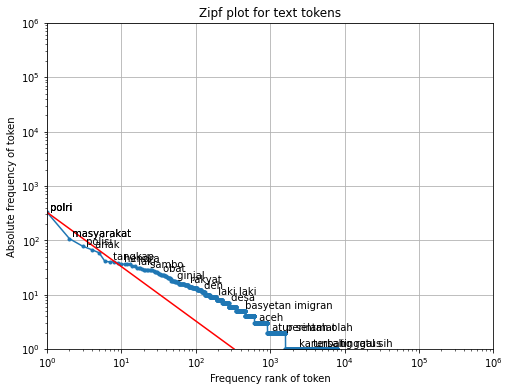

In [ ]:
from pylab import *
counts = term_freq_df.Total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for text tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]],
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 20 tokens in negative ')

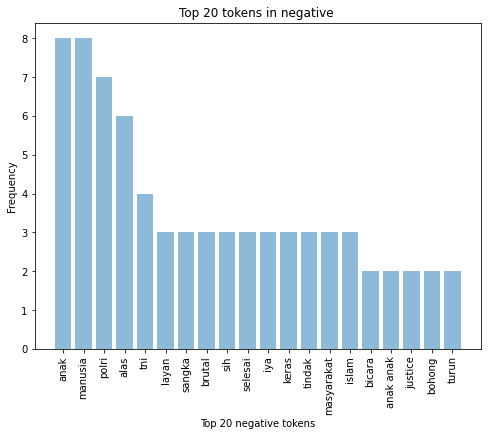

In [ ]:
y_pos = np.arange(20)
plt.figure(figsize=(8,6))
plt.bar(y_pos, term_freq_df.sort_values(by='Negative', ascending=False)['Negative'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='Negative', ascending=False)['Negative'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 negative tokens')
plt.title('Top 20 tokens in negative ')

Text(0.5, 1.0, 'Top 20 tokens in Netral ')

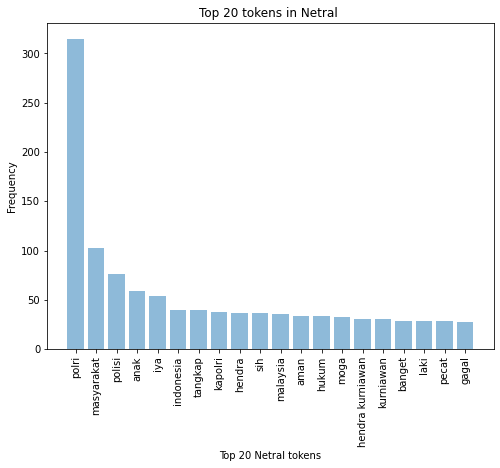

In [ ]:
y_net = np.arange(20)
plt.figure(figsize=(8,6))
plt.bar(y_net, term_freq_df.sort_values(by='Netral', ascending=False)['Netral'][:20], align='center', alpha=0.5)
plt.xticks(y_net, term_freq_df.sort_values(by='Netral', ascending=False)['Netral'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 Netral tokens')
plt.title('Top 20 tokens in Netral ')

Text(0.5, 1.0, 'Top 20 tokens in positive')

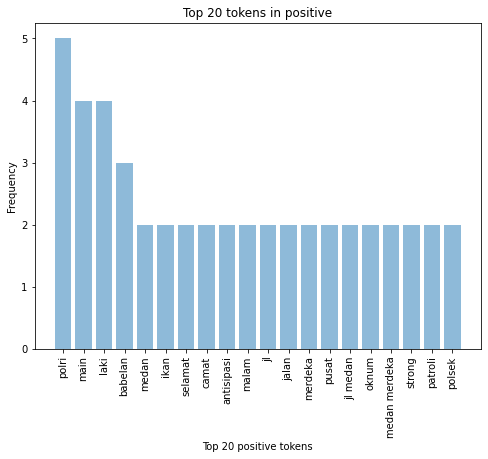

In [ ]:
y_pos = np.arange(20)
plt.figure(figsize=(8,6))
plt.bar(y_pos, term_freq_df.sort_values(by='Positive', ascending=False)['Positive'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='Positive', ascending=False)['Positive'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 positive tokens')
plt.title('Top 20 tokens in positive')

In [ ]:
cv1 = CountVectorizer()
x_traincv = cv1.fit_transform(["mbak miring miring arah barat prinsip sebar gaduh protes victim cari usul menkominfo cocok karakter",
                               "payung hukum warga tetangga masyarakat hak dobrak rumah tetangga indikasi keras aneh rumah warga takut care",
                               "sambang obyek vital bhabinkamtibmas aiptu siswanto ikan himbauan aman tertib masyarakat terap protokol sehat"])

In [ ]:
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(cv1.get_feature_names()))
x_traincv_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aiptu,aman,aneh,arah,barat,bhabinkamtibmas,care,cari,cocok,dobrak,...,sehat,siswanto,takut,terap,tertib,tetangga,usul,victim,vital,warga
0,0,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,2,0,0,0,2
2,1,1,0,0,0,1,0,0,0,0,...,1,1,0,1,1,0,0,0,1,0


## **Feature Extraction**

In [ ]:
text = np.array(tweet_df['Text'])
label = np.array(tweet_df['Label'])

# build train and test datasets
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42)

In [ ]:
text_train[20]

'tweet cari info iya'

In [ ]:
label_train[20]

0

CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# build BOW features
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(text_train)
cv_test_features = cv.transform(text_test)

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build TFIDF features
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(text_train)
tv_test_features = tv.transform(text_test)

Implementation of CountVectorizer & TF-IDF

In [ ]:
# transform test reviews into features
cv_test_features = cv.transform(text_test)
tv_test_features = tv.transform(text_test)

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (715, 2114)  Test features shape: (179, 2114)
TFIDF model:> Train features shape: (715, 6634)  Test features shape: (179, 6634)


## **Klasifikasi Model Training, Prediction and Performance Evaluation**

### **Evaluation metrics**

In [ ]:
#Evaluation metrics

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc


def get_metrics(true_labels, predicted_labels):

    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),
                        2))


def train_predict_model(classifier,
                        train_features, train_labels,
                        test_features, test_labels):
    # build model
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    return predictions


def display_confusion_matrix(true_labels, predicted_labels, classes=[-1, 0, 1]):

    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm,
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes],
                                                  labels=level_labels),
                            index=pd.MultiIndex(levels=[['Actual:'], classes],
                                                labels=level_labels))
    print(cm_frame)

def display_classification_report(true_labels, predicted_labels, classes=[-1, 0, 1]):

    report = metrics.classification_report(y_true=true_labels,
                                           y_pred=predicted_labels,
                                           labels=classes)
    print(report)



def display_model_performance_metrics(true_labels, predicted_labels, classes=[-1, 0, 1]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    # print('\nPrediction Confusion Matrix:')
    # print('-'*30)
    # display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):

    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")

    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black',
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):

    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1]
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)

    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]),
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# Naive Bayes model on BOW features
nb_bow_predictions = train_predict_model(classifier=nb,
                                             train_features=cv_train_features, train_labels=label_train,
                                             test_features=cv_test_features, test_labels=label_test)

display_model_performance_metrics(true_labels=label_test, predicted_labels=nb_bow_predictions,classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.95

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.65      0.38      0.41       179
weighted avg       0.96      0.96      0.95       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
# Naive Bayes model on TF-IDF features
nb_tfidf_predictions = train_predict_model(classifier=nb,
                                               train_features=tv_train_features, train_labels=label_train,
                                               test_features=tv_test_features, test_labels=label_test)

display_model_performance_metrics(true_labels=label_test, predicted_labels=nb_tfidf_predictions,classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)

In [ ]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr,
                                             train_features=cv_train_features, train_labels=label_train,
                                             test_features=cv_test_features, test_labels=label_test)

display_model_performance_metrics(true_labels=label_test, predicted_labels=lr_bow_predictions,classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.95

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       1.00      0.14      0.25         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.65      0.38      0.41       179
weighted avg       0.96      0.96      0.95       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
#Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr,
                                               train_features=tv_train_features, train_labels=label_train,
                                               test_features=tv_test_features, test_labels=label_test)
display_model_performance_metrics(true_labels=label_test, predicted_labels=lr_tfidf_predictions,classes=[-1,0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1)

In [ ]:
# Random Forest model on BOW features
rfc_bow_predictions = train_predict_model(classifier=rfc,
                                             train_features=cv_train_features, train_labels=label_train,
                                             test_features=cv_test_features, test_labels=label_test)

display_model_performance_metrics(true_labels=label_test, predicted_labels=rfc_bow_predictions,classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
# RandomForest model on TF-IDF
rfc_tfidf_predictions = train_predict_model(classifier=rfc,
                                                train_features=tv_train_features, train_labels=label_train,
                                                test_features=tv_test_features, test_labels=label_test)
display_model_performance_metrics(true_labels=label_test, predicted_labels=rfc_tfidf_predictions,
                                      classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

### **K – Nearest Neighbor (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
# K – Nearest Neighbor (KNN) model on BOW features
knn_bow_predictions = train_predict_model(classifier=knn,
                                             train_features=cv_train_features, train_labels=label_train,
                                             test_features=cv_test_features, test_labels=label_test)

display_model_performance_metrics(true_labels=label_test, predicted_labels=knn_bow_predictions,classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
# K – Nearest Neighbor (KNN) on TF-IDF
knn_tfidf_predictions = train_predict_model(classifier=knn,
                                                train_features=tv_train_features, train_labels=label_train,
                                                test_features=tv_test_features, test_labels=label_test)
display_model_performance_metrics(true_labels=label_test, predicted_labels=knn_tfidf_predictions,
                                      classes=[-1, 0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.96
Precision: 0.91
Recall: 0.96
F1 Score: 0.93

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         7
           0       0.96      1.00      0.98       171
           1       0.00      0.00      0.00         1

    accuracy                           0.96       179
   macro avg       0.32      0.33      0.33       179
weighted avg       0.91      0.96      0.93       179



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 